In [1]:
import numpy as np
import pandas as pd

from src.M4_experiment import M4_parser
from src.utils_visualization import plot_prediction
from src.ESRNN import ESRNN

In [2]:
X_df_train, y_df_train = M4_parser(dataset_name='Quarterly', mode='train', num_obs=100)

X_df_test = X_df_train.loc[X_df_train['unique_id'].isin(['Q1'])]
X_df_test = X_df_test[['unique_id', 'ds']].groupby('unique_id').last().reset_index()
y_test = y_df_train.loc[X_df_train['unique_id'].isin(['Q1'])]

In [5]:
y_df_train

,unique_id,ds,y
0,Q1,1970-01-02,7407.412314
1,Q1,1970-01-03,7528.566074
2,Q1,1970-01-04,7374.709225
3,Q1,1970-01-05,7395.514848
4,Q1,1970-01-06,7654.007989
...,...,...,...
8988,Q100,1970-03-01,7090.000000
8989,Q100,1970-03-02,7015.000000
8990,Q100,1970-03-03,6925.000000
8991,Q100,1970-03-04,6868.000000


In [3]:
esrnn = ESRNN(max_epochs=1, batch_size=1)
esrnn.fit(X_df_train, y_df_train)
y_hat = esrnn.predict(X_df_test)

========== Training ESRNN ==========

========= Epoch 0 finished =========
Training time: 8.139627695083618
Forecast loss: 0.08462110161781311
Train finished!


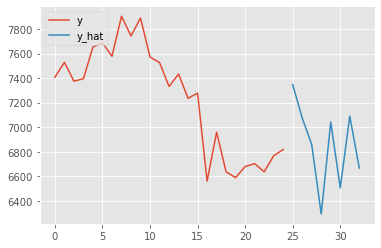

In [4]:
plot_prediction(y_test['y'], y_hat['y_hat'])

In [5]:
esrnn = ESRNN(max_epochs=10, batch_size=2)
esrnn.fit(X_df_train, y_df_train)
y_hat = esrnn.predict(X_df_test)

========== Training ESRNN ==========

========= Epoch 0 finished =========
Training time: 3.0701990127563477
Forecast loss: 0.0870470330119133
========= Epoch 1 finished =========
Training time: 3.105170965194702
Forecast loss: 0.07972340285778046
========= Epoch 2 finished =========
Training time: 2.9968299865722656
Forecast loss: 0.07771167159080505
========= Epoch 3 finished =========
Training time: 3.14005184173584
Forecast loss: 0.07611952722072601
========= Epoch 4 finished =========
Training time: 3.128491163253784
Forecast loss: 0.07474519312381744
========= Epoch 5 finished =========
Training time: 3.1571950912475586
Forecast loss: 0.07356484979391098
========= Epoch 6 finished =========
Training time: 3.192117929458618
Forecast loss: 0.07256069779396057
========= Epoch 7 finished =========
Training time: 3.2925026416778564
Forecast loss: 0.07151568681001663
========= Epoch 8 finished =========
Training time: 3.165349245071411
Forecast loss: 0.0706692487001419
========= Epoch 

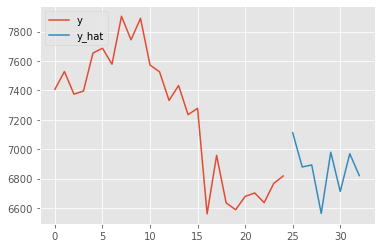

In [6]:
plot_prediction(y_test['y'], y_hat['y_hat'])